# Importing packages needed

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn import preprocessing 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.metrics import make_scorer
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [2]:
train = pd.read_csv("C:/Users/devan/Desktop/programming/final/train.csv")
test = pd.read_csv("C:/Users/devan/Desktop/programming/final/test.csv")

In [3]:
copy_test = test

# Data Exploration

we begin by exploring the data set by looking at distributions, correlation, histograms, missing values

In [4]:
print("Train set size:", train.shape)
print("Test set size:", test.shape)
train.head()
train.tail()
train.info()
train.describe().T

Train set size: (1460, 81)
Test set size: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl    

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


The mean sale price of a house in the train dataframe is USD180921. The cheapest house was sold for USD34900 while the most expensive house was USD755000. The houses were built between 1872 and 2010, and sold between 2006 and 2010. The average living area was 1515 sq ft, with the smallest house at 334 sq ft and the largest at 5642 sq ft. The average garage area was 473 sq ft, with the smallest at 0 sq ft (no garage) and the largest at 1418 sq ft. The average number of rooms in a house was 6.51, with a minimum of 2 and maximum of 14

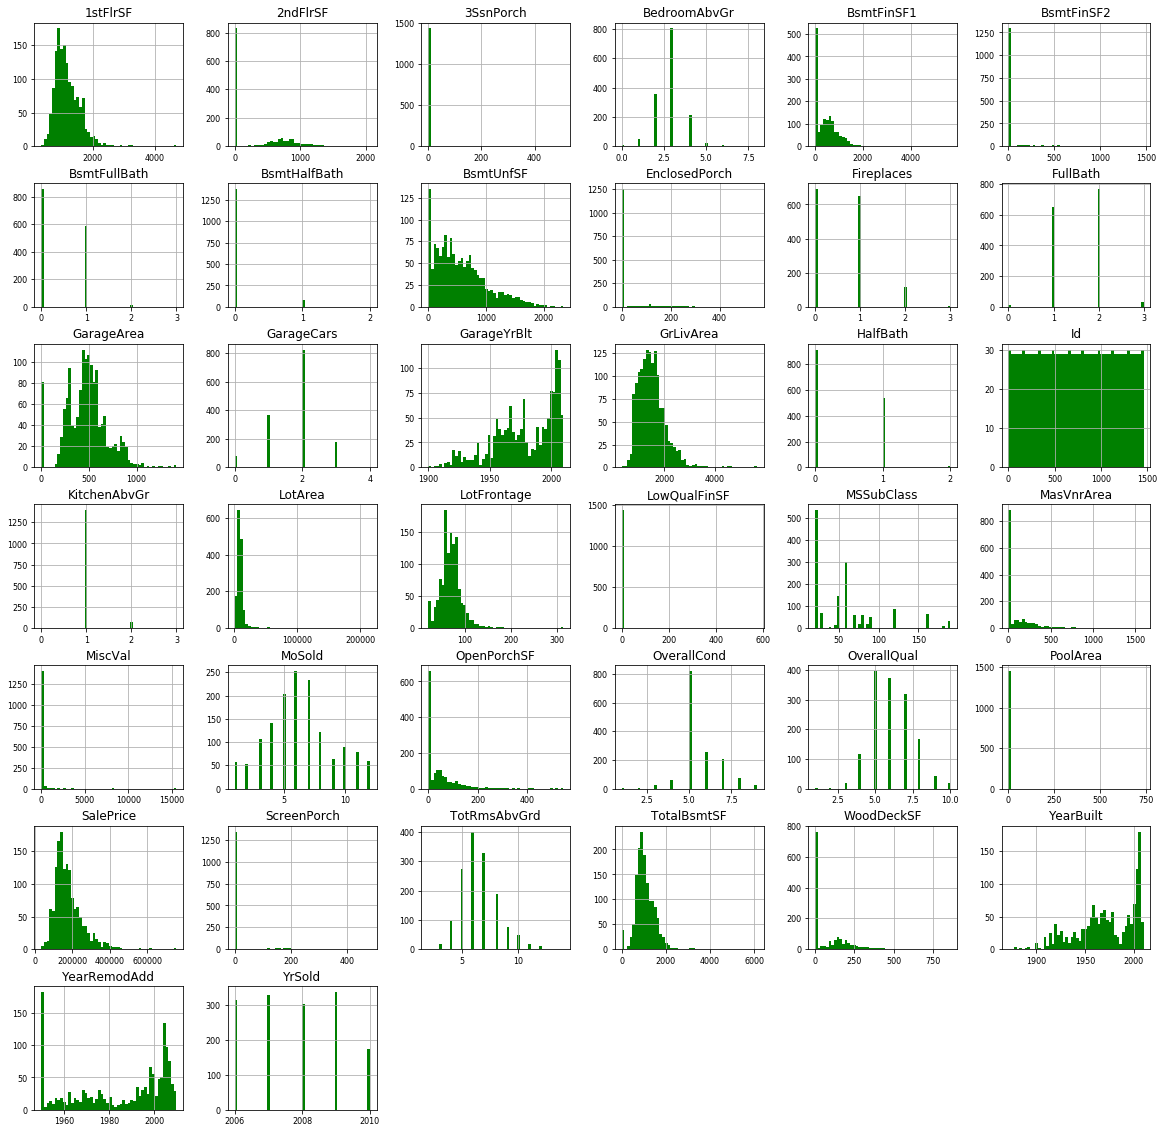

In [5]:
tempa = train.select_dtypes(include = ['float64', 'int64'])
tempa.hist(figsize=(20, 20), bins=50,color='g', xlabelsize=8, ylabelsize=8);

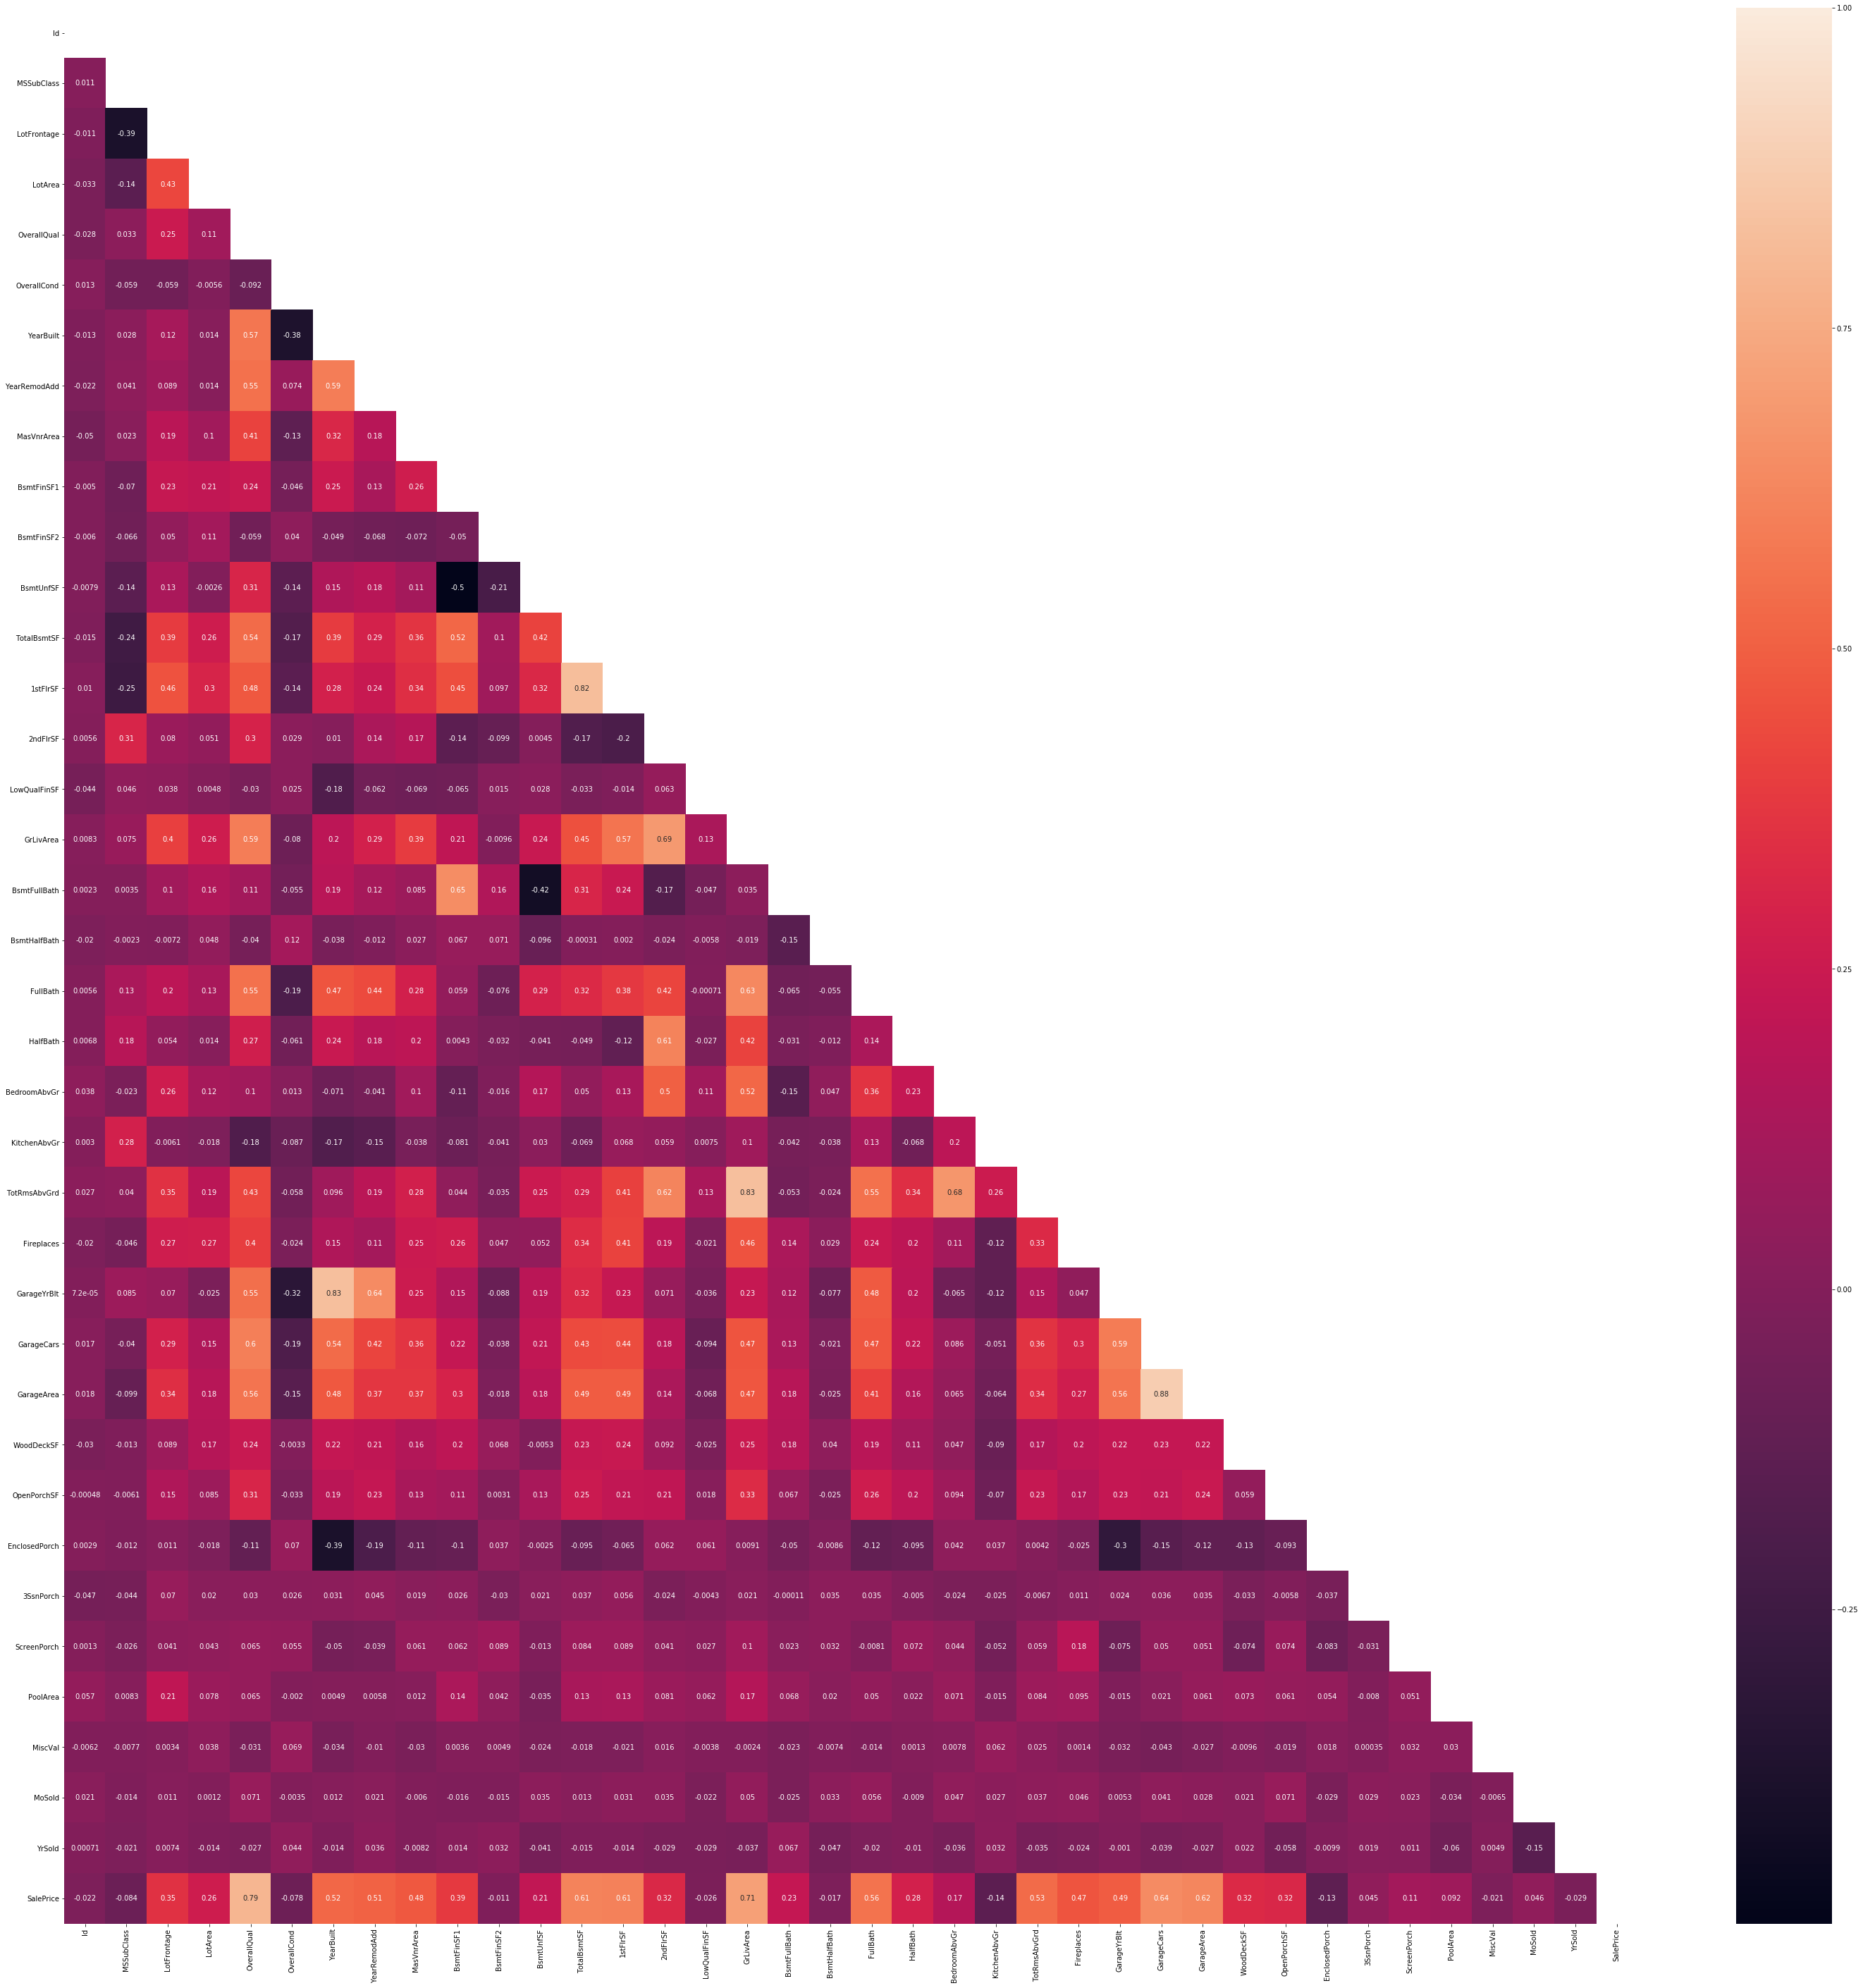

In [6]:
corrr=train.corr()
plt.figure(figsize = (50,50))
ax = sns.heatmap(corrr, annot=True, mask=np.triu(np.ones_like(train.corr(), dtype=np.bool)))

In [7]:
tempacorr = tempa.corr()['SalePrice'][:-1]
high = tempacorr[abs(tempacorr) > 0.5].sort_values(ascending=False)
print("strong relationships".format(len(high), high))

strong relationships


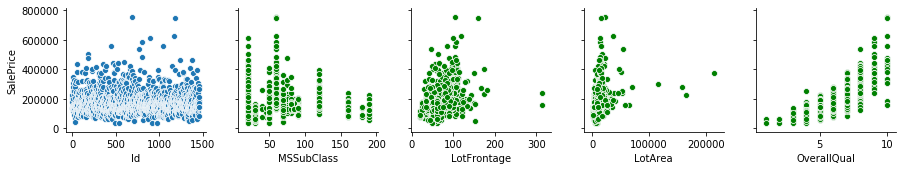

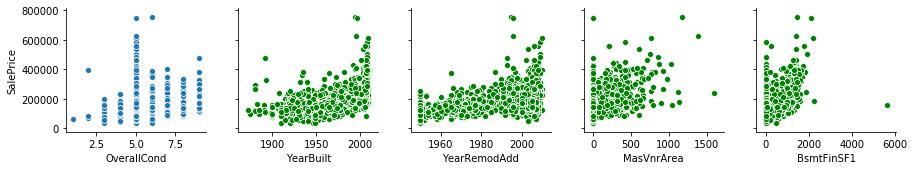

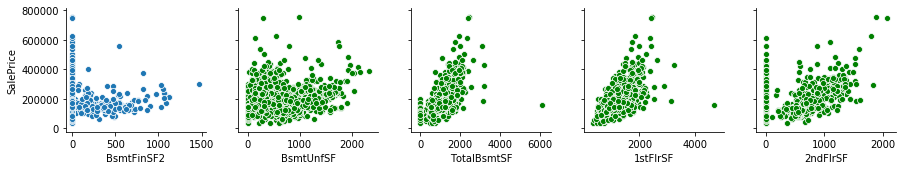

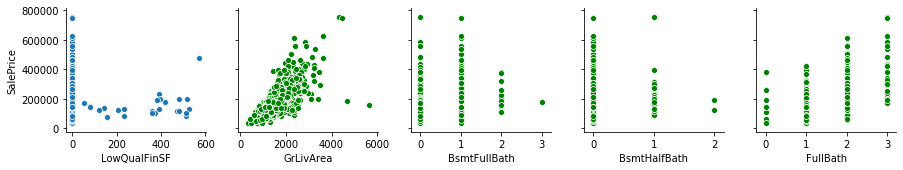

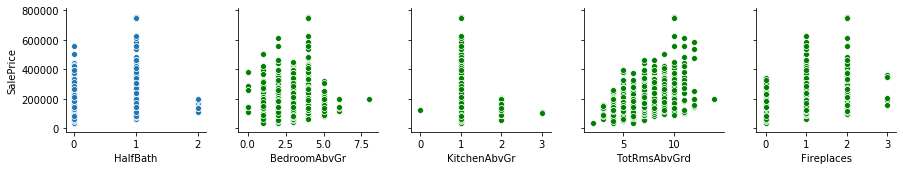

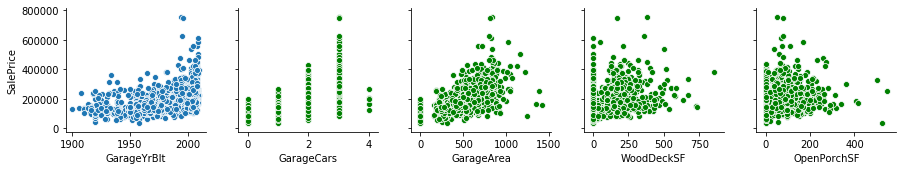

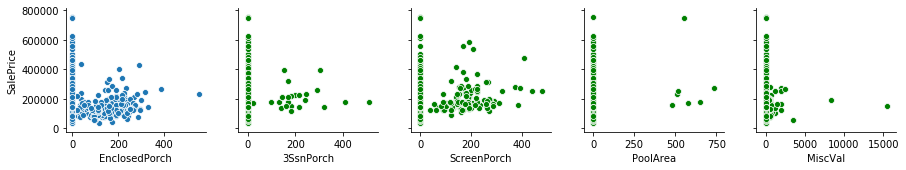

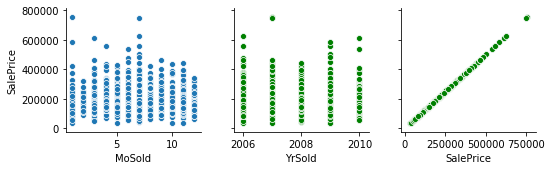

In [8]:
for i in range(0, len(tempa.columns), 5):
    g=sns.pairplot(data=tempa, x_vars=tempa.columns[i:i+5],y_vars=['SalePrice']) 
    g.map_upper(sns.scatterplot,color='green') 
    g.map_lower(sns.scatterplot, color='green') 



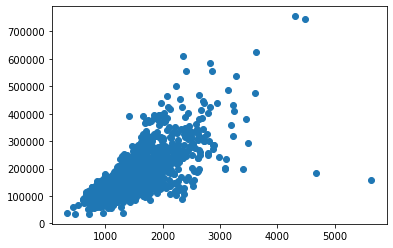

In [9]:
plt.scatter(train.GrLivArea, train.SalePrice)

We tried running the models but ID seemed to be an issue later on, so we drop it initially and work with our dataset

In [10]:
train_Id= train['Id']
test_Id = test['Id']
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

We will now try to nromalize the data 

In [11]:
df = pd.concat([train.SalePrice, np.log(train.SalePrice + 1).rename('LogSalePrice')], axis=1, names=['SalePrice', 'LogSalePrice'])

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: LogSalePrice, dtype: float64


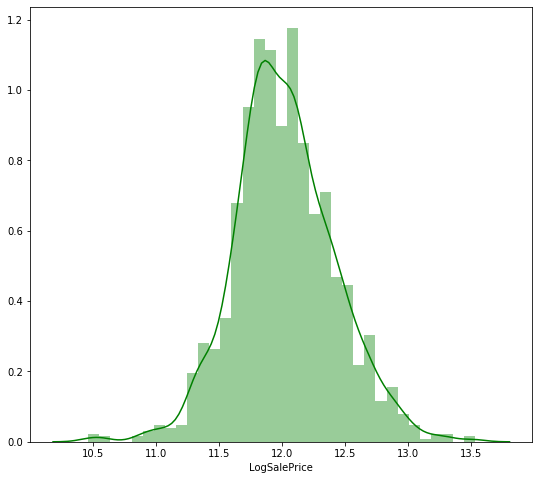

In [12]:
print(df['LogSalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['LogSalePrice'], color='g');

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


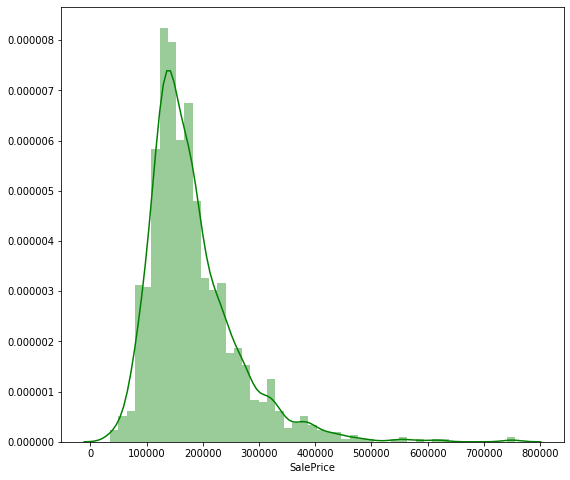

In [13]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g');

We can see above log fits a much normal distribution. We keep this because it follows the assumptions of equal variances when vreating regressions

Since a log sale price fits a normal distribution, we will go ahead and transform the sale price with a logarithmic transformation

In [14]:
train.SalePrice = np.log1p(train.SalePrice)
#This is the log proce we will use 
#source https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

In [15]:
#we take this sale price out and store it as a separate variable and aknowledge this will be the Y value
saleprice = train['SalePrice']
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

we decide to join the training and testing files so it easier to work with

In [16]:
features = pd.concat([train_features, test_features]).reset_index(drop=True)
features.shape

(2919, 79)

# Data Cleaning: Missing Values, Skew

## we will first examine and handle missing values

We chose the first 35 because after that we got a drop of .05. So this was really us finding the number that gave us the highest % of missing values. 

In [17]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    return dict_x
missing = percent_missing(features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:35]



Percent of missing data


[('PoolQC', 99.66),
 ('MiscFeature', 96.4),
 ('Alley', 93.22),
 ('Fence', 80.44),
 ('FireplaceQu', 48.65),
 ('LotFrontage', 16.65),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45),
 ('GarageType', 5.38),
 ('BsmtCond', 2.81),
 ('BsmtExposure', 2.81),
 ('BsmtQual', 2.77),
 ('BsmtFinType2', 2.74),
 ('BsmtFinType1', 2.71),
 ('MasVnrType', 0.82),
 ('MasVnrArea', 0.79),
 ('MSZoning', 0.14),
 ('Utilities', 0.07),
 ('BsmtFullBath', 0.07),
 ('BsmtHalfBath', 0.07),
 ('Functional', 0.07),
 ('Exterior1st', 0.03),
 ('Exterior2nd', 0.03),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.03),
 ('BsmtUnfSF', 0.03),
 ('TotalBsmtSF', 0.03),
 ('Electrical', 0.03),
 ('KitchenQual', 0.03),
 ('GarageCars', 0.03),
 ('GarageArea', 0.03),
 ('SaleType', 0.03),
 ('MSSubClass', 0.0)]

#### we visualized the bar plot fo missing values

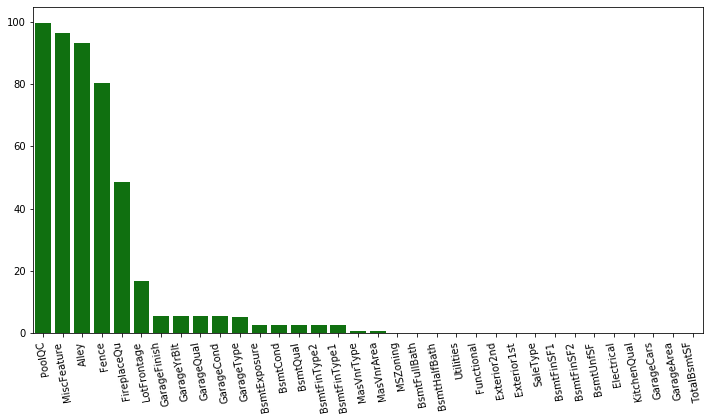

In [18]:
bp = (features.isnull().sum() / len(features)) * 100
bp = bp.drop(bp[bp == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="100")
sns.barplot(x=bp.index, y=bp, color = 'g')


There are a significant number of features with large numbers of null values. It would be inadvisable to drop all the rows straightaway as it could compromise the integrity of the data. The null values could be an indication that there is no such feature in this house, as the null values tend to be consistent between columns referring to the same feature (eg. garage, bsmt, pool, masvnr).

Solution:
First convert null in int and flt columns to 0 (there are already many numeric columns with large numbers of 0s) and convert null in object columns to 'None' (there are already 864 'None' values in masvnrtype column). Which columns to drop will be decided later based on how stongly correlated the features are with saleprice

First, I will find the columns which have too many 0 or None values 

High % of NA: 
fireplacequ(48.68%), miscfeature(96.4%), alley(93.21%),fence(80.75%)
Then I will check their correlation with saleprice. If correlation is low, will drop as they have too many null values and have little impact on sale price

In [19]:
features[features.PoolArea != 0][["PoolArea", "PoolQC"]]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
1974,144,Ex
2420,368,NaN
2503,444,NaN


From above you can see that some cells are not lining up. We dont have poolQC but we have pool area? This could be meaningful for our data so we fill them in with the avg value 

We use the data dictionary for the most part ti fill in the NA. For the other parts we saw some sources and attempted to implement those. We ran our models with all the possible varaitions of imputnig missing  values. These seemed to work the ebst for us. 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [20]:
features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
pd.set_option('max_columns', None)

In [21]:
features.loc[2418, 'PoolQC'] = 'Fa'
features.loc[2501, 'PoolQC'] = 'Gd'
features.loc[2597, 'PoolQC'] = 'Fa'
pd.set_option('max_columns', None)
features[(features['GarageType'] == 'Detchd') & features['GarageYrBlt'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2126,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
2576,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [22]:
features.loc[2124, 'GarageYrBlt'] = features['GarageYrBlt'].median()
features.loc[2574, 'GarageYrBlt'] = features['GarageYrBlt'].median()

features.loc[2124, 'GarageFinish'] = features['GarageFinish'].mode()[0]
features.loc[2574, 'GarageFinish'] = features['GarageFinish'].mode()[0]

features.loc[2574, 'GarageCars'] = features['GarageCars'].median()

features.loc[2124, 'GarageArea'] = features['GarageArea'].median()
features.loc[2574, 'GarageArea'] = features['GarageArea'].median()

features.loc[2124, 'GarageQual'] = features['GarageQual'].mode()[0]
features.loc[2574, 'GarageQual'] = features['GarageQual'].mode()[0]

features.loc[2124, 'GarageCond'] = features['GarageCond'].mode()[0]
features.loc[2574, 'GarageCond'] = features['GarageCond'].mode()[0]

basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF']

tempdf = features[basement_columns]
tempdfnulls = tempdf[tempdf.isnull().any(axis=1)]

In [23]:
features.loc[332, 'BsmtFinType2'] = 'ALQ'
features.loc[947, 'BsmtExposure'] = 'No' 
features.loc[1485, 'BsmtExposure'] = 'No'
features.loc[2038, 'BsmtCond'] = 'TA'
features.loc[2183, 'BsmtCond'] = 'TA'
features.loc[2215, 'BsmtQual'] = 'Po' 
features.loc[2216, 'BsmtQual'] = 'Fa'
features.loc[2346, 'BsmtExposure'] = 'No'
features.loc[2522, 'BsmtCond'] = 'Gd' 
subclass_group = features.groupby('MSSubClass')
Zoning_modes = subclass_group['MSZoning'].apply(lambda x : x.mode()[0])

In [24]:
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)


In [25]:
neighborhood_group = features.groupby('Neighborhood')
lot_medians = neighborhood_group['LotFrontage'].median()
lot_medians

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [26]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
pd.set_option('max_columns', None)

In [27]:
pd.set_option('max_columns', None)


In [28]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics.append(i)
        
features.update(features[numerics].fillna(0))

nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)

In [29]:
features[features['GarageYrBlt'] == 2207]
features.loc[2590, 'GarageYrBlt'] = 2007
features.isnull().values.any()

False

## Skew

We will now analyze any skew of our features and apply boxcox1

In [30]:
level = ['MSSubClass']
for i in level:
    features.update(features[i].astype('str'))
numberr = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numberr2 = []
for i in features.columns:
    if features[i].dtype in numberr: 
        numberr2.append(i)
skew_features = features[numberr2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index


In [31]:
for i in skew_index:
    features[i]= boxcox1p(features[i], boxcox_normmax(features[i]+1))
skew_features2 = features[numberr2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})


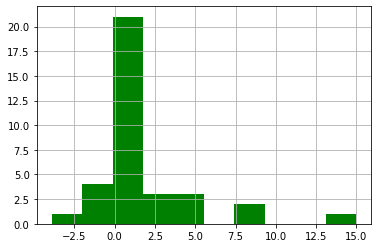

In [32]:
skews2['skew'].hist(bins=10, color = 'g')

In [33]:
#We drop utilities and street as they have the highest skew and will not contribute 
features = features.drop(['Utilities', 'Street'], axis=1)

# Feature Creation

We will now create new featurees. We might need the datatypes to remain as ints/floats so we will create our features first and then convert the data types into categories using the label encoder

In [34]:
features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +features['1stFlrSF'] + features['2ndFlrSF'])
features['Total_Bathrooms'] = (features['FullBath'] + (0.5*features['HalfBath']) + features['BsmtFullBath'] + (0.5*features['BsmtHalfBath']))
features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] + features['EnclosedPorch'] + features['ScreenPorch'] +features['WoodDeckSF'])
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Data Cleaning: Converting the data types into Factors

In [35]:
features.dtypes

MSSubClass            object
MSZoning              object
LotFrontage          float64
LotArea              float64
Alley                 object
LotShape              object
LandContour           object
LotConfig             object
LandSlope             object
Neighborhood          object
Condition1            object
Condition2            object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond          float64
YearBuilt              int64
YearRemodAdd           int64
RoofStyle             object
RoofMatl              object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea           float64
ExterQual             object
ExterCond             object
Foundation            object
BsmtQual              object
BsmtCond              object
BsmtExposure          object
                      ...   
GarageType            object
GarageYrBlt          float64
GarageFinish          object
GarageCars    

we will now take the variables that are objects and store them as strings and apply the label encoder. We choose to label encode instead of creating dummy variables because dummy variables will increase the number of "features" significantly which may add noise to the model. Applying labels to the object columns with low cardinalities will allow us to keep the same amount of features and control for the noise a little better which may improve our accuracy.

In [36]:
string = features.columns[features.dtypes == "object"]
string

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
string2= ['MSSubClass', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSZoning']

In [38]:
for col in string2:
    le = preprocessing.LabelEncoder()
    le.fit(list(features[col].values)) 
    features[col] = le.transform(list(features[col].values))

# Defining Our Test and Train Data

Before we progress to checking other conditions on our features, we will go ahead and define our testing and training data without scaling to test for overfitting and outliers

In [39]:
X = features.iloc[:len(y),:]
testing_features = features.iloc[len(X):,:]

print(X.shape)
print(testing_features.shape)

(1460, 85)
(1459, 85)


# Data Cleaning:  Reducing Overfitting 

Now that we have created our features, we will test our features to reduce any overfitting. We will also check for outliers that may be best to drop.

## Overfitting

In [40]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [41]:
overfit = list(overfit)
overfit

[]

# Scaling and Defining the X_train, X_test, y_train, y_test

In [42]:
std_scaler=StandardScaler()
X_std=std_scaler.fit_transform(X)
test_std=std_scaler.transform(testing_features)
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.002,random_state=52)
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


# Setting Up Evaluation Functions

In [43]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [44]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [45]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

# Model 1: Light GBM

In [46]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1, class_weight = "balanced")
lgb_regressor= lgb_regressor.fit(X_train, y_train)
test_pred = lgb_regressor.predict(X_test)
train_pred = lgb_regressor.predict(X_train)
score = cross_val(lgb_regressor)
print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)


[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5,

In [47]:
results_df = pd.DataFrame(data=[["Light GBM", *evaluate(y_test, test_pred) , score]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

# Model 2: Linear Regression

In [48]:
linear_reg = LinearRegression()
linear_reg= linear_reg.fit(X_train, y_train)
test_pred = linear_reg.predict(X_test)
train_pred = linear_reg.predict(X_train)
score2 = cross_val(linear_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)


Train Summary

MAE: 0.08060173281021722
MSE: 0.014297285482508458
RMSE: 0.11957125692451534
R2 Square 0.9103532609450637

Test Summary

MAE: 0.07510841799960015
MSE: 0.0057593422951786035
RMSE: 0.07589033070937697
R2 Square 0.9498016366068882


In [49]:
results_df_2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , score2]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

# Model 3: Elastic Net

In [50]:
model = ElasticNetCV(alphas=np.linspace(.001, 1000, 200), cv=5)
model = model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
score3 = cross_val(model)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)



Train Summary

MAE: 0.08299192906156336
MSE: 0.015438811924688985
RMSE: 0.12425301575691829
R2 Square 0.9031956698616609

Test Summary

MAE: 0.06728781796399079
MSE: 0.004720621142417576
RMSE: 0.06870677653927286
R2 Square 0.9588551186223713


In [51]:
results_df_3 = pd.DataFrame(data=[["Elastic Net", *evaluate(y_test, test_pred) , score3]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)

# Model 4: Ridge

In [52]:
ridge = RidgeCV(alphas=np.linspace(.001, 1000, 200), cv=5)
ridge = ridge.fit(X_train, y_train)
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)
score4 = cross_val(ridge)
print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08410806910777273
MSE: 0.01615717454927029
RMSE: 0.12711087502361978
R2 Square 0.8986913975764466

Test Summary

MAE: 0.07349102873558049
MSE: 0.005919080191334272
RMSE: 0.07693555869254654
R2 Square 0.9484093628804966


In [53]:
results_df_4 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred) , score4]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)

# Model 5: Lasso

In [54]:
lasso = LassoCV(alphas=np.linspace(.001, 1000, 200), cv=5)
lasso = lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)
score5= cross_val(lasso)
print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)



Train Summary

MAE: 0.0831732035479532
MSE: 0.015537928470192103
RMSE: 0.12465122731121464
R2 Square 0.9025741899939185

Test Summary

MAE: 0.06805301561058326
MSE: 0.004890914657973985
RMSE: 0.06993507459046558
R2 Square 0.9573708422346755


In [55]:
results_df_5 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , score5]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_5, ignore_index=True)

# Model 6: Gradient Boost

In [56]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg =gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)
score6 = cross_val(gb_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.029941402512314055
MSE: 0.0045023019674995
RMSE: 0.06709919498398993
R2 Square 0.9717696978128648

Test Summary

MAE: 0.06956620910666504
MSE: 0.006628913570624766
RMSE: 0.0814181403043865
R2 Square 0.9422224630409065


In [57]:
results_df_6 = pd.DataFrame(data=[["Gradient Boost", *evaluate(y_test, test_pred) , score6]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_6, ignore_index=True)

# Model 7: Support Vector Regression

In [58]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg=svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
score7 = cross_val(svm_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)


Train Summary

MAE: 0.0010916927621806788
MSE: 1.2334321487160254e-06
RMSE: 0.0011105999048784513
R2 Square 0.9999922661424008

Test Summary

MAE: 0.07788998820221534
MSE: 0.008589414589402655
RMSE: 0.09267909467297712
R2 Square 0.9251347579646576


In [59]:
results_df_7 = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred) , score7]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_7, ignore_index=True)

# Cross Validation - Part 1 

We will now cross validate our model for assessing how the results of a statistical analysis will generalize to an independent data set.This will help us estimate how accurately a predictive model will perform when we test it.

In [60]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Light GBM,0.101431,0.011987,0.109487,0.895518,0.899238
1,Linear Regression,0.075108,0.005759,0.075890,0.949802,0.879134
2,Elastic Net,0.067288,0.004721,0.068707,0.958855,0.876556
3,Ridge,0.073491,0.005919,0.076936,0.948409,0.875081
4,Lasso,0.068053,0.004891,0.069935,0.957371,0.876565
5,Gradient Boost,0.069566,0.006629,0.081418,0.942222,0.903475
6,SVM,0.077890,0.008589,0.092679,0.925135,-0.000421


# Detecting Outliers 

Ridge Method

In [61]:
rr = Ridge(alpha=10)
rr.fit(X, y)
np.sqrt(-cross_val_score(rr, X, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.1384052825640401

In [62]:
y_pred = rr.predict(X)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  30,  142,  277,  328,  410,  462,  473,  495,  523,  560,  588,
        608,  628,  632,  666,  681,  688,  714,  774,  803,  812,  874,
        885,  898,  916,  968,  970, 1170, 1181, 1182, 1211, 1298, 1324,
       1423, 1432, 1453], dtype=int64)

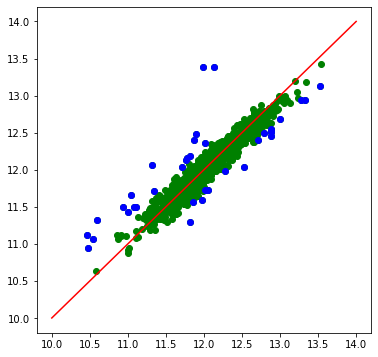

In [63]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, color= 'green')
plt.scatter(y.iloc[outliers1], y_pred[outliers1], color = 'blue')
plt.plot(range(10, 15), range(10, 15), color="red")

Elastic Net Method

In [64]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(X, y)
np.sqrt(-cross_val_score(er, X, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.13779150115357494

In [65]:
y_pred = er.predict(X)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers2 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers2

array([  30,   93,  142,  190,  277,  328,  410,  462,  473,  495,  523,
        560,  588,  608,  628,  632,  666,  681,  688,  714,  774,  803,
        812,  874,  885,  898,  916,  966,  968,  970, 1181, 1182, 1211,
       1298, 1324, 1383, 1423, 1432, 1453], dtype=int64)

In [66]:
print(len(outliers1))
print(len(outliers2))

36
39


Elastic gave us one more than that of ridge

In [67]:
outliers = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outliers.append(i)
outliers

[30,
 142,
 277,
 328,
 410,
 462,
 473,
 495,
 523,
 560,
 588,
 608,
 628,
 632,
 666,
 681,
 688,
 714,
 774,
 803,
 812,
 874,
 885,
 898,
 916,
 968,
 970,
 1181,
 1182,
 1211,
 1298,
 1324,
 1423,
 1432,
 1453]

In [68]:
X = X.drop([30,
 66,
 93,
 142,
 190,
 218,
 277,
 308,
 328,
 410,
 462,
 473,
 479,
 495,
 558,
 559,
 587,
 607,
 627,
 631,
 657,
 661,
 665,
 680,
 687,
 713,
 727,
 773,
 802,
 811,
 863,
 873,
 884,
 897,
 915,
 941,
 967,
 969,
 1021,
 1061,
 1121,
 1138,
 1177,
 1180,
 1199,
 1210,
 1211,
 1322,
 1335,
 1381,
 1421,
 1430,
 1451])

In [69]:
X.shape

(1407, 85)

In [70]:
y = y.drop([30,
 66,
 93,
 142,
 190,
 218,
 277,
 308,
 328,
 410,
 462,
 473,
 479,
 495,
 558,
 559,
 587,
 607,
 627,
 631,
 657,
 661,
 665,
 680,
 687,
 713,
 727,
 773,
 802,
 811,
 863,
 873,
 884,
 897,
 915,
 941,
 967,
 969,
 1021,
 1061,
 1121,
 1138,
 1177,
 1180,
 1199,
 1210,
 1211,
 1322,
 1335,
 1381,
 1421,
 1430,
 1451])

In [71]:
y.shape

(1407,)

## Retesting the Model

In [72]:
std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()


X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(testing_features)
test_rbst=rbst_scaler.transform(testing_features)
test_pwr=power_transformer.transform(testing_features)


In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=52)

## Model 1: Light GBM

In [74]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1, class_weight = "balanced")
lgb_regressor= lgb_regressor.fit(X_train, y_train)
test_pred = lgb_regressor.predict(X_test)
train_pred = lgb_regressor.predict(X_train)
score = cross_val(lgb_regressor)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)


[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5,

In [75]:
results_df = pd.DataFrame(data=[["Light GBM", *evaluate(y_test, test_pred) , score]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

## Model 2: Linear Regression

In [76]:
linear_reg = LinearRegression()
linear_reg= linear_reg.fit(X_train, y_train)


test_pred = linear_reg.predict(X_test)
train_pred = linear_reg.predict(X_train)
score2 = cross_val(linear_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.07110955535495003
MSE: 0.00959297765764844
RMSE: 0.0979437474147709
R2 Square 0.9384410359277338

Test Summary

MAE: 0.09309902160526719
MSE: 0.027266821170831304
RMSE: 0.16512668218925525
R2 Square 0.8252597293409656


In [77]:
results_df_2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , score2]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

## Model 3: Elastic Net

In [78]:
model = ElasticNetCV(alphas = np.arange(0.01, 1.0, 0.005), l1_ratio=0.5)
model = model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
score3 = cross_val(model)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.07799755205801802
MSE: 0.013069555181364175
RMSE: 0.11432215525157044
R2 Square 0.9161315384479567

Test Summary

MAE: 0.0907637028069558
MSE: 0.021589894233802073
RMSE: 0.14693500002995227
R2 Square 0.8616404920002092


In [79]:
results_df_3 = pd.DataFrame(data=[["Elastic Net", *evaluate(y_test, test_pred) , score3]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)

## Model 4: Ridge

In [80]:
ridge = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)
ridge = ridge.fit(X_train, y_train)


test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)
score4 = cross_val(ridge)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.07865821104716247
MSE: 0.01300017715405125
RMSE: 0.11401831937917367
R2 Square 0.9165767432261994

Test Summary

MAE: 0.09435683124674875
MSE: 0.02318487602685622
RMSE: 0.15226580714939325
R2 Square 0.8514190016230081


In [81]:
results_df_4 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred) , score4]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)

## Model 5: Lasso

In [82]:
lasso = LassoCV(alphas=np.linspace(.001, 1000, 200), cv=5)
lasso = lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)
score5= cross_val(lasso)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.07546168788982628
MSE: 0.011614474294680243
RMSE: 0.10777047042061311
R2 Square 0.9254689178542561

Test Summary

MAE: 0.09220140297059101
MSE: 0.023903445150679048
RMSE: 0.1546073903494883
R2 Square 0.8468140290668985


In [83]:
results_df_5 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , score5]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_5, ignore_index=True)

## Model 6: Gradient Boost

In [84]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg =gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)
score6 = cross_val(gb_reg)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.02406654922107977
MSE: 0.0028639990453148694
RMSE: 0.05351634372147325
R2 Square 0.9816214713902751

Test Summary

MAE: 0.08186488202444187
MSE: 0.017611734960038823
RMSE: 0.13270921203910008
R2 Square 0.8871346493083507


In [85]:
results_df_6 = pd.DataFrame(data=[["Gradient Boost", *evaluate(y_test, test_pred) , score6]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_6, ignore_index=True)

## Model 7: SVM Regression

In [86]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg=svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
score7 = cross_val(svm_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)


Train Summary

MAE: 0.0010763030067078847
MSE: 1.1999322403185214e-06
RMSE: 0.0010954141866520268
R2 Square 0.9999922999314387

Test Summary

MAE: 0.10176008743552263
MSE: 0.025111585367201608
RMSE: 0.15846635405410706
R2 Square 0.8390716249521477


In [87]:
results_df_7 = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred) , score7]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_7, ignore_index=True)

# Model Evaluation After Removing Outliers

In [88]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Light GBM,0.084534,0.018235,0.135036,0.883142,0.909989
1,Linear Regression,0.093099,0.027267,0.165127,0.825260,0.884727
2,Elastic Net,0.090764,0.021590,0.146935,0.861640,0.867218
3,Ridge,0.094357,0.023185,0.152266,0.851419,0.879259
4,Lasso,0.092201,0.023903,0.154607,0.846814,0.883224
5,Gradient Boost,0.081865,0.017612,0.132709,0.887135,0.911407
6,SVM,0.101760,0.025112,0.158466,0.839072,-0.000135


# Feature Selection

In [89]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kfolds))
    return(rmse)


lm = LinearRegression()
benchmark_model = make_pipeline(RobustScaler(),lm).fit(X=X, y=y)
cv_rmse(benchmark_model).mean()


0.1339716198980408

In [90]:
coeffs = pd.DataFrame(list(zip(X.columns, benchmark_model.steps[1][1].coef_)), columns=['Predictors', 'Coefficients'])

coeffs.sort_values(by='Coefficients', ascending=False)

,Predictors,Coefficients
79,Total_porch_sf,3.297532e+11
41,2ndFlrSF,2.695477e+10
31,BsmtFinSF1,3.696650e+09
78,Total_Bathrooms,1.163633e+09
33,BsmtFinSF2,3.114303e+07
40,1stFlrSF,8.456229e+06
68,PoolArea,4.638042e+00
82,hasgarage,4.865635e-01
43,GrLivArea,1.349220e-01
14,OverallQual,1.205281e-01


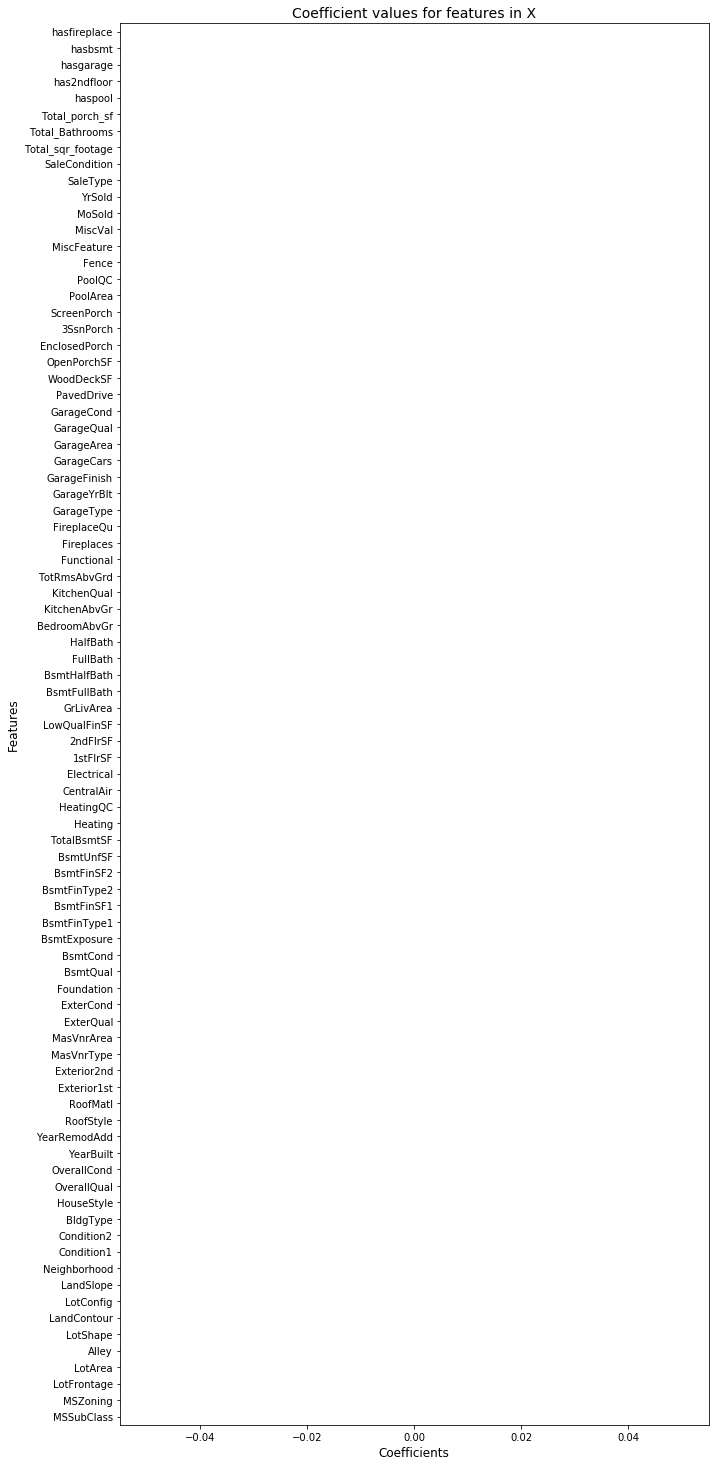

In [91]:
pd.Series(coeffs["Coefficients"], index = coeffs["Predictors"]).plot.barh(figsize=(10,20))
plt.tight_layout()
plt.title('Coefficient values for features in X', fontsize =14)
plt.xlabel('Coefficients', fontsize=12)
plt.ylabel('Features', fontsize=12);

In [92]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [93]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True])

In [94]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [95]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Total_Bathrooms', 'Total_porch_sf', 'hasfireplace'],
      dtype='object')

In [96]:
X=X[selected_feat]

In [97]:
testing_features=testing_features[selected_feat]

# Testing the Model After Feature Selection

In [98]:
std_scaler=StandardScaler()
X_std=std_scaler.fit_transform(X)
test_std=std_scaler.transform(testing_features)



In [99]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=52)

## Model 1: Light GBM

In [100]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1, class_weight = "balanced")
lgb_regressor= lgb_regressor.fit(X_train, y_train)
test_pred = lgb_regressor.predict(X_test)
train_pred = lgb_regressor.predict(X_train)
score = cross_val(lgb_regressor)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5,

In [101]:
results_df = pd.DataFrame(data=[["Light GBM", *evaluate(y_test, test_pred) , score]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

## Model 2: Linear Regression

In [102]:
linear_reg = LinearRegression()
linear_reg= linear_reg.fit(X_train, y_train)


test_pred = linear_reg.predict(X_test)
train_pred = linear_reg.predict(X_train)
score2 = cross_val(linear_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08105802125914702
MSE: 0.013878127872950088
RMSE: 0.11780546622695437
R2 Square 0.9109428578268288

Test Summary

MAE: 0.08942089921899062
MSE: 0.021380622987706665
RMSE: 0.14622114411981144
R2 Square 0.8629816132829123


In [103]:
results_df_2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , score2]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

## Model 3: Elastic Net 

In [104]:
model = ElasticNetCV(alphas = np.arange(0.01, 1.0, 0.005), l1_ratio=0.5)
model = model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
score3 = cross_val(model)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08225329432546837
MSE: 0.014559033566562522
RMSE: 0.12066082034597031
R2 Square 0.9065734273303167

Test Summary

MAE: 0.08851563317481737
MSE: 0.020467618785014165
RMSE: 0.14306508583513367
R2 Square 0.8688326290830963


In [105]:
results_df_3 = pd.DataFrame(data=[["Elastic Net", *evaluate(y_test, test_pred) , score3]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)

## Model 4: Ridge

In [106]:
ridge = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)
ridge = ridge.fit(X_train, y_train)


test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)
score4 = cross_val(ridge)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08312644534479063
MSE: 0.01479476823112814
RMSE: 0.1216337462677531
R2 Square 0.9050606976790584

Test Summary

MAE: 0.09117283189828056
MSE: 0.021712289695017695
RMSE: 0.1473509066650684
R2 Square 0.8608561168841566


In [107]:
results_df_4 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred) , score4]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)

## Model 5: Lasso

In [108]:
lasso = LassoCV(alphas=np.linspace(.001, 1000, 200), cv=5)
lasso = lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)
score5= cross_val(lasso)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08106416485742314
MSE: 0.013947041679662866
RMSE: 0.11809759387753362
R2 Square 0.9105006319921702

Test Summary

MAE: 0.08867324315093404
MSE: 0.020947146032483266
RMSE: 0.144731289058321
R2 Square 0.86575956381868


In [109]:
results_df_5 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , score5]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_5, ignore_index=True)

# Model 6: Gradient Boost

In [110]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg =gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)
score6 = cross_val(gb_reg)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.02508133722601519
MSE: 0.002981433663152402
RMSE: 0.054602506015314
R2 Square 0.9808678833305201

Test Summary

MAE: 0.08142892735902942
MSE: 0.018112034409465395
RMSE: 0.1345809585694254
R2 Square 0.8839284647422934


In [111]:
results_df_6 = pd.DataFrame(data=[["Gradient Boost", *evaluate(y_test, test_pred) , score6]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_6, ignore_index=True)

# Model 7: SVR

In [112]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg=svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
score7 = cross_val(svm_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)


Train Summary

MAE: 0.0010941807447214151
MSE: 1.2399238561655019e-06
RMSE: 0.0011135186824501428
R2 Square 0.9999920433017945

Test Summary

MAE: 0.09981659901852388
MSE: 0.025486157199726953
RMSE: 0.15964384485387137
R2 Square 0.836671169725385


In [113]:
results_df_7 = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred) , score7]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_7, ignore_index=True)

# Model Evaluation 

In [114]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Light GBM,0.085443,0.018475,0.135924,0.881600,0.905194
1,Linear Regression,0.089421,0.021381,0.146221,0.862982,0.884252
2,Elastic Net,0.088516,0.020468,0.143065,0.868833,0.869794
3,Ridge,0.091173,0.021712,0.147351,0.860856,0.884258
4,Lasso,0.088673,0.020947,0.144731,0.865760,0.883960
5,Gradient Boost,0.081429,0.018112,0.134581,0.883928,0.910006
6,SVM,0.099817,0.025486,0.159644,0.836671,-0.002685


# HyperParamter Tuning- DO NOT RUN THIS PART, IT WILL TAKE 2 DAYS

# SKIP TO THE NEXT PART TO TEST MODELS WITH TUNING 

## Next part title: "Testing After Tuning"

## Tuning Model 1 Light GBM

## Model 1: Light GBM - uncomment to run. takes forever to run

#lgb_regressor=lgb.LGBMRegressor()
#lgb_regressor.get_params().keys()

std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("lgb_regressor", lgb_regressor)])
    
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
boosting_type = ['gbdt', 'dart']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

parameters = dict(lgb_regressor__n_estimators=n_estimators, 
                  lgb_regressor__boosting_type=boosting_type, lgb_regressor__learning_rate=learning_rate, 
                  lgb_regressor__min_child_weight=min_child_weight
                 )

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_std, y)

print("Best Number Of Components:", clf_GS.best_estimator_.get_params()["pca__n_components"])
print(); print(clf_GS.best_estimator_.get_params()["lgb_regressor"])

CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

## Model 2: Linear Regression 

In [115]:
linear_reg = LinearRegression()
linear_reg.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [116]:
std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("linear_reg", linear_reg)])
    

normalize = [True, False]

parameters = dict(linear_reg__normalize=normalize,
                 )

In [117]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_std, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('linear_reg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                      

In [118]:
print("Best Number Of Components:", clf_GS.best_estimator_.get_params()["pca__n_components"])
print(); print(clf_GS.best_estimator_.get_params()["linear_reg"])

CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Number Of Components: None

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

[0.93096294 0.89850165 0.88834564 0.90110191 0.81638533]

0.8870594931021729

0.03808442388557322


## Model 3: Elastic Net Tuning

In [119]:
en = linear_model.ElasticNetCV()
en.get_params().keys()

dict_keys(['alphas', 'copy_X', 'cv', 'eps', 'fit_intercept', 'l1_ratio', 'max_iter', 'n_alphas', 'n_jobs', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'verbose'])

In [120]:
std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("en", en)])
    

normalize = [True, False]
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
n_alphas = [100,150,200,250]
positive = [True, False]

parameters = dict(
                      en__l1_ratio=l1_ratio,
                      en__n_alphas=n_alphas,
                      en__positive=positive,
                       en__normalize=normalize,
                 )

In [121]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_std, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('en',
                                        ElasticNetCV(alphas=None, copy_X=True,
                                                     cv='warn', eps=0.001,
                                                     fi

In [122]:
print("Best Number Of Components:", clf_GS.best_estimator_.get_params()["pca__n_components"])
print(); print(clf_GS.best_estimator_.get_params()["en"])

CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Number Of Components: None

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=1, max_iter=1000, n_alphas=150, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

[0.92586731 0.90043915 0.88678681 0.90048343 0.81920571]

0.8865564822138914

0.03596723034172885


## Model 4: Ridge Tuning

In [123]:
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_std, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [124]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-0.017597013770973932


In [125]:
ridge = linear_model.Ridge()
ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [126]:
std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("ridge", ridge)])
    
    
n_components = list(range(1,X_std.shape[1]+1,1))

normalize = [True, False]
solver = ["auto", "svd", "cholesky", "lsqr", "sparse_cg"]

parameters = dict(pca__n_components=n_components,
                      ridge__normalize=normalize,
                      ridge__solver=solver)

In [127]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_std, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,...
                                              random

In [128]:
print("Best Number Of Components:", clf_GS.best_estimator_.get_params()["pca__n_components"])
print(); print(clf_GS.best_estimator_.get_params()["ridge"])

CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Number Of Components: 47

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

[0.93095698 0.89846696 0.88913995 0.90106176 0.81650121]

0.887225371462295

0.03804167291839176


## Model 5: Lasso Tuning

In [129]:
lasso = linear_model.LassoCV()
lasso.get_params().keys()

dict_keys(['alphas', 'copy_X', 'cv', 'eps', 'fit_intercept', 'max_iter', 'n_alphas', 'n_jobs', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'verbose'])

In [130]:
std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("lasso", lasso)])
    

positive = [True, False]


parameters = dict(
                      lasso__positive=positive,        
                 )

In [131]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_std, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('lasso',
                                        LassoCV(alphas=None, copy_X=True,
                                                cv='warn', eps=0.001,
                                                fit_intercept=

In [132]:
print(); print(clf_GS.best_estimator_.get_params()["lasso"])

CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

[0.92611726 0.9007098  0.88596196 0.90038804 0.82012318]

0.8866600464672632

0.035694166575163444


## Model 6: Gradient Boost Tuning

In [133]:
#gb_reg = GradientBoostingRegressor()
#gb_reg.get_params().keys()

In [134]:
#std_slc = StandardScaler()
#pca = decomposition.PCA()

#pipe = Pipeline(steps=[("std_slc", std_slc),
                           #("pca", pca),
                           #("gb_reg", gb_reg)])
    
#loss = ['ls', 'lad', 'huber', 'quantile']
#learning_rate=[0.05,0.1]
#max_depth = [2, 3, 5]
#max_features=['auto', 'sqrt', 'log2']
#warm_start = [True, False]
#n_estimators = [100, 500, 900]


#parameters = dict(gb_reg__loss=loss,gb_reg__learning_rate=learning_rate,gb_reg__max_depth=max_depth,gb_reg__max_features=max_features,gb_reg__warm_start=warm_start,gb_reg__n_estimators=n_estimators)

In [135]:
#clf_GS = GridSearchCV(pipe, parameters)
#clf_GS.fit(X_std, y)

In [136]:
#print(); print(clf_GS.best_estimator_.get_params()["gb_reg"])

#CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
#print(); print(CV_Result)
#print(); print(CV_Result.mean())
#print(); print(CV_Result.std())

## Model 7: SVM Tuning

In [137]:
svm_reg = SVR()
svm_reg.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [138]:
std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("svm_reg", svm_reg)])
    

shrinking = [True, False]
verbose = [True, False]
gamma=['scale', 'auto'] 


parameters = dict(
                      svm_reg__shrinking=shrinking,  svm_reg__verbose=verbose, svm_reg__gamma=gamma       
                 )

In [139]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_std, y)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svm_reg',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='auto_dep

In [140]:
print(); print(clf_GS.best_estimator_.get_params()["svm_reg"])

CV_Result = cross_val_score(clf_GS, X_std, y, cv=5, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

[0.89035728 0.87192018 0.81887675 0.85796455 0.82463066]

0.852749884667108

0.027375496212613433


# Testing Models Post Tuning

## Model 1: Light GBM

In [141]:
lgb_regressor=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=1, min_split_gain=0.0,
              n_estimators=1100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgb_regressor= lgb_regressor.fit(X_train, y_train)
test_pred = lgb_regressor.predict(X_test)
train_pred = lgb_regressor.predict(X_train)
score = cross_val(lgb_regressor)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.0027329867408125617
MSE: 7.893793766731781e-05
RMSE: 0.008884702452379472
R2 Square 0.9994934484534187

Test Summary

MAE: 0.08912018474662779
MSE: 0.017933822204547038
RMSE: 0.1339172214636603
R2 Square 0.8850705431946027


In [142]:
results_df = pd.DataFrame(data=[["Light GBM", *evaluate(y_test, test_pred) , score]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

## Model 2: Linear Regression

In [143]:
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linear_reg= linear_reg.fit(X_train, y_train)


test_pred = linear_reg.predict(X_test)
train_pred = linear_reg.predict(X_train)
score2 = cross_val(linear_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08105802125914702
MSE: 0.013878127872950086
RMSE: 0.11780546622695437
R2 Square 0.9109428578268288

Test Summary

MAE: 0.08942089921899053
MSE: 0.021380622987706658
RMSE: 0.1462211441198114
R2 Square 0.8629816132829125


In [144]:

results_df_2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , score2]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)


## Model 3: Elastic Net

In [145]:
model = ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=True, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
model = model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
score3 = cross_val(model)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08116028475351271
MSE: 0.01412917176933876
RMSE: 0.11886619270986498
R2 Square 0.9093318875160588

Test Summary

MAE: 0.08867973181586826
MSE: 0.020998761155259924
RMSE: 0.14490949297841024
R2 Square 0.8654287867006732


In [146]:
results_df_3 = pd.DataFrame(data=[["Elastic Net", *evaluate(y_test, test_pred) , score3]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)


## Model 4: Ridge

In [147]:
ridge = Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001,)

ridge = ridge.fit(X_train, y_train)


test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)
score4 = cross_val(ridge)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.0810288793880319
MSE: 0.013878804487417363
RMSE: 0.11780833793674098
R2 Square 0.9109385159335014

Test Summary

MAE: 0.08944917023437485
MSE: 0.021383920658443217
RMSE: 0.1462324199979034
R2 Square 0.8629604800575379


In [148]:
results_df_4 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred) , score4]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)

## Model 5: Lasso

In [149]:
lasso = LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
lasso = lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)
score5= cross_val(lasso)


print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

Train Summary

MAE: 0.08119579505646901
MSE: 0.013998688057920837
RMSE: 0.11831605156495392
R2 Square 0.9101692127335097

Test Summary

MAE: 0.08853692675801786
MSE: 0.020795166814475213
RMSE: 0.14420529398907384
R2 Square 0.8667335273593103


In [150]:
results_df_5 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , score5]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_5, ignore_index=True)

## Model 6: Gradient Boost

In [151]:
#gb_reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          #learning_rate=0.05, loss='huber', max_depth=2,
                          #max_features='auto', max_leaf_nodes=None,
                          #min_impurity_decrease=0.0, min_impurity_split=None,
                          #min_samples_leaf=1, min_samples_split=2,
                          #min_weight_fraction_leaf=0.0, n_estimators=900,
                          #n_iter_no_change=None, presort='auto',
                          #random_state=None, subsample=1.0, tol=0.0001,
                          #validation_fraction=0.1, verbose=0, warm_start=False)
#gb_reg =gb_reg.fit(X_train, y_train)

#test_pred = gb_reg.predict(X_test)
#train_pred = gb_reg.predict(X_train)
#score6 = cross_val(gb_reg)


#print("Train Summary")
#print()
#print_evaluate(y_train,train_pred)
#print()
#print("Test Summary")
#print()
#print_evaluate(y_test,test_pred)

In [152]:
#results_df_6 = pd.DataFrame(data=[["Gradient Boost", *evaluate(y_test, test_pred) , score6]], 
                            #columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
#results_df = results_df.append(results_df_6, ignore_index=True)

## Model 7: SVR

In [153]:
svm_reg = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
svm_reg=svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
score7 = cross_val(svm_reg)

print("Train Summary")
print()
print_evaluate(y_train,train_pred)
print()
print("Test Summary")
print()
print_evaluate(y_test,test_pred)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Train Summary

MAE: 0.06356934102908202
MSE: 0.005547889986217223
RMSE: 0.07448415929724402
R2 Square 0.964398712003031

Test Summary

MAE: 0.10410305856197292
MSE: 0.026702717381188425
RMSE: 0.1634096612235287
R2 Square 0.8288748060037132


In [154]:
results_df_7 = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred) , score7]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_7, ignore_index=True)

# Final Model Evaluation 

In [155]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Light GBM,0.089120,0.017934,0.133917,0.885071,0.900580
1,Linear Regression,0.089421,0.021381,0.146221,0.862982,0.884252
2,Elastic Net,0.088680,0.020999,0.144909,0.865429,0.885123
3,Ridge,0.089449,0.021384,0.146232,0.862960,0.846025
4,Lasso,0.088537,0.020795,0.144205,0.866734,0.774006
5,SVM,0.104103,0.026703,0.163410,0.828875,0.734561


# Model Selection

insert text on why ridge

# Stacking

In [156]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

In [157]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas =np.logspace(0, 5, 200), cv=5))

lasso = make_pipeline(RobustScaler(),LassoCV(max_iter=1e7, alphas = np.logspace(0, 5, 200),random_state = 42, cv=5))

elasticnet = make_pipeline(RobustScaler(),ElasticNetCV(max_iter=1e7, alphas=np.logspace(0, 5, 200), cv=kfolds, l1_ratio=(0.8, 0.85, 0.9, 0.95, 0.99, 1)))


lightgbm = make_pipeline(RobustScaler(),lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,
max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, 
min_sum_hessian_in_leaf = 11))

In [158]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,lightgbm), 
                               meta_regressor=ridge,
                               use_features_in_secondary=True)

In [159]:
stackX = np.array(X_std)
stacky = np.array(y)

In [160]:
stack_gen_model = stack_gen.fit(stackX, stacky)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [161]:
a=stack_gen_model.predict(test_std)

In [162]:
a= np.exp(a)

In [163]:
a

array([124498.33162264, 154636.59992603, 183272.88881033, ...,
       163031.65084705, 116236.45800532, 226718.8737901 ])

# Predicting on Test 

In [164]:
test["Predicted_Value"] = a
test["Id"]= test_Id
actual = pd.read_csv("C:/Users/devan/Desktop/programming/final/test_actual_price.csv")
df=pd.merge(test, actual, on = "Id") 
mape = np.mean(np.abs(df['SalePrice'] - df['Predicted_Value']) / df['SalePrice'])

In [165]:
print("MAPE: " + str(mape))

MAPE: 0.08262024174148941


## Writing to submission  CSV

In [166]:
df_submission = pd.DataFrame(columns = ['Id', 'SalePrice'])

In [167]:
df_submission['Id']= df["Id"]
df_submission['SalePrice']= df['Predicted_Value']

In [168]:
df_submission

,Id,SalePrice
0,1461,124498.331623
1,1462,154636.599926
2,1463,183272.888810
3,1464,199816.663539
4,1465,192436.522232
5,1466,171779.808317
6,1467,179571.350710
7,1468,164459.109272
8,1469,183132.578049
9,1470,119326.088927


In [169]:
df_submission.to_csv('Cobra_Submission.csv', index = False)